# Count .fchk Files in a Directory

This notebook demonstrates how to count the number of `.fchk` files in a given directory using Python's `pathlib` module.

In [ ]:
# Import Required Libraries
from pathlib import Path

## Define Function to Count .fchk Files

The following function recursively counts all `.fchk` files in the specified directory.

In [ ]:
def count_fchk_files(directory):
    directory = Path(directory)
    fchk_files = list(directory.rglob("*.fchk"))
    return len(fchk_files)

## Specify Directory Path

Set the directory path to the folder you want to search for `.fchk` files.

In [1]:
# Set your directory path here
# Example: dir_path = "/home/sethih1/masque_new/ters_gen/"
dir_path = "/path/to/your/folder"

## Count and Display Number of .fchk Files

Call the function and print the number of `.fchk` files found in the specified directory.

In [2]:
num_fchk_files = count_fchk_files(dir_path)
print(f"Number of .fchk files: {num_fchk_files}")

NameError: name 'count_fchk_files' is not defined

Number of .npz files: 1840
Processed (with atom counts): 1840
Files with missing element/atomic-number info: 0


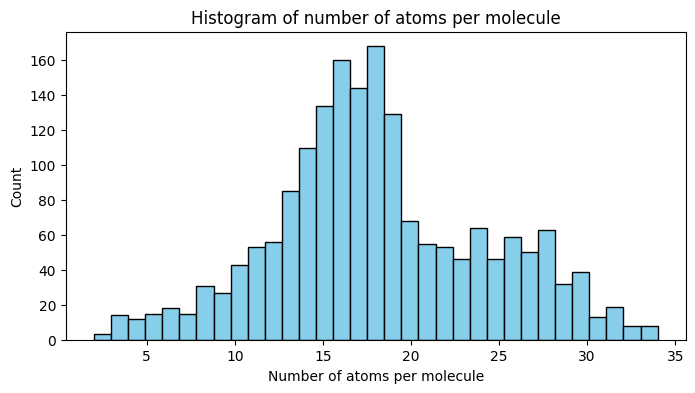

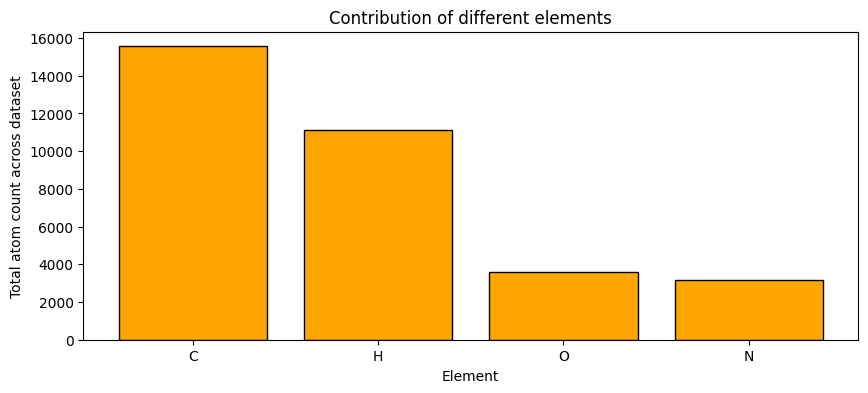

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict

# small periodic table mapping (index = atomic number)
PERIODIC_TABLE = [
    None, 'H','He','Li','Be','B','C','N','O','F','Ne',
    'Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca',
    'Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn',
    'Ga','Ge','As','Se','Br','Kr','Rb','Sr','Y','Zr',
    'Nb','Mo','Tc','Ru','Rh','Pd','Ag','Cd','In','Sn',
    'Sb','Te','I','Xe','Cs','Ba','La','Ce','Pr','Nd',
    'Pm','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb',
    'Lu','Hf','Ta','W','Re','Os','Ir','Pt','Au','Hg',
    'Tl','Pb','Bi','Po','At','Rn'
]

# Directory containing .npz files
npz_dir = "/scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_0.05/"
npz_files = list(Path(npz_dir).rglob("*.npz"))
print(f"Number of .npz files: {len(npz_files)}")
# find /scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_0.05/ -type f -iname "*.npz" | wc -l

num_atoms_list = []
element_counts = defaultdict(int)
missing_info_files = []

for file in npz_files:
    data = np.load(file, allow_pickle=True)
    keys = list(data.keys())

    # detect keys
    symbol_key = next((k for k in keys if any(s in k.lower() for s in ('element','symbol','atom_symbols','atom_types','species','labels'))), None)
    atomicnum_key = next((k for k in keys if any(s in k.lower() for s in ('atomic','number','numbers','z','zs'))), None)
    pos_key = next((k for k in keys if any(s in k.lower() for s in ('pos','coord','xyz'))), None)

    if symbol_key is not None:
        elements = np.asarray(data[symbol_key]).astype(str)
        n = len(elements)
        num_atoms_list.append(n)
        for el in elements:
            element_counts[el] += 1
    elif atomicnum_key is not None:
        nums = np.asarray(data[atomicnum_key], dtype=int)
        n = len(nums)
        num_atoms_list.append(n)
        for z in nums:
            zint = int(z)
            sym = PERIODIC_TABLE[zint] if 0 < zint < len(PERIODIC_TABLE) and PERIODIC_TABLE[zint] is not None else str(zint)
            element_counts[sym] += 1
    elif pos_key is not None:
        pos = np.asarray(data[pos_key])
        n = int(getattr(pos, 'shape', (len(pos),))[0])
        num_atoms_list.append(n)
        element_counts['unknown'] += n
        missing_info_files.append((file, keys))
    else:
        missing_info_files.append((file, keys))
        # skip

# Summary
print('Processed (with atom counts):', len(num_atoms_list))
print('Files with missing element/atomic-number info:', len(missing_info_files))
if missing_info_files:
    print('Example missing file keys (up to 5):')
    for ff, ks in missing_info_files[:5]:
        print(' ', ff.name, 'keys:', ks)

# Histogram of number of atoms
if num_atoms_list:
    bins = max(10, min(50, max(num_atoms_list) - min(num_atoms_list) + 1))
    plt.figure(figsize=(8, 4))
    plt.hist(num_atoms_list, bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel('Number of atoms per molecule')
    plt.ylabel('Count')
    plt.title('Histogram of number of atoms per molecule')
    plt.show()
else:
    print('No atom counts available to plot.')

# Element contribution bar chart
if element_counts:
    elems, counts = zip(*sorted(element_counts.items(), key=lambda x: -x[1]))
    plt.figure(figsize=(10, 4))
    plt.bar(elems, counts, color='orange', edgecolor='black')
    plt.xlabel('Element')
    plt.ylabel('Total atom count across dataset')
    plt.title('Contribution of different elements')
    plt.show()
else:
    print('No element information available to plot.')

In [5]:
# element/atomic-number parsing and plotting consolidated in the previous cell
# (previous cell now handles 'atomic_numbers' and 'atom_pos' keys)

Number of .npz files: 1840
File: /scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_0.05/test/27492.npz, Keys: ['atom_pos', 'atomic_numbers', 'x_pos', 'y_pos', 'frequencies', 'spectrums']
File: /scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_0.05/test/136679.npz, Keys: ['atom_pos', 'atomic_numbers', 'x_pos', 'y_pos', 'frequencies', 'spectrums']
File: /scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_0.05/test/153669.npz, Keys: ['atom_pos', 'atomic_numbers', 'x_pos', 'y_pos', 'frequencies', 'spectrums']
File: /scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_0.05/test/132811.npz, Keys: ['atom_pos', 'atomic_numbers', 'x_pos', 'y_pos', 'frequencies', 'spectrums']
File: /scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_0.05/test/1456.npz, Keys: ['atom_pos', 'atomic_numbers', 'x_pos', 'y_pos', 'frequencies', 'spectrum

KeyboardInterrupt: 

In [ ]:
/scratch/phys/sin/sethih1/check_temp_count/FCHK



In [1]:
# Simplified: compute RMSD/planarity for all .fchk files and write a CSV (no parallelism)
import csv
from pathlib import Path

import numpy as np

# reuse existing helpers in the repo
from notebooks.utils.read_files import read_fchk
from notebooks.utils.planarity import pca, planarity


def compute_rmsd_csv(fchk_dir, out_csv, bohr_to_angstrom=False):
    """Scan `fchk_dir` recursively, compute RMSD/planarity for each .fchk and save CSV.

    - No multiprocessing, one file at a time (simple & robust).
    - Set bohr_to_angstrom=True if coordinates in the .fchk are in bohr.
    """
    fchk_dir = Path(fchk_dir)
    files = sorted(fchk_dir.rglob("*.fchk"))
    if len(files) == 0:
        print(f"No .fchk files found in {fchk_dir}")
        return []

    BOHR_TO_ANG = 0.52917721092
    rows = []
    for i, f in enumerate(files, start=1):
        try:
            coords, atomic_numbers = read_fchk(str(f))
            if coords is None or coords.size == 0:
                rows.append({
                    "path": str(f), "name": f.name, "n_atoms": 0,
                    "rmsd": None, "planarity_pca_pct": None, "planarity_rms_pct": None,
                    "error": "no-coordinates",
                })
                continue

            if bohr_to_angstrom:
                coords = np.asarray(coords, dtype=float) * BOHR_TO_ANG

            eigvals, eigvecs, X = pca(coords)
            plan_pca, plan_rms, rmsd = planarity(eigvals, eigvecs, X)

            rows.append({
                "path": str(f),
                "name": f.name,
                "n_atoms": int(coords.shape[0]),
                "rmsd": float(rmsd),
                "planarity_pca_pct": float(plan_pca),
                "planarity_rms_pct": float(plan_rms),
                "error": "",
            })
        except Exception as exc:
            rows.append({
                "path": str(f), "name": f.name, "n_atoms": None,
                "rmsd": None, "planarity_pca_pct": None, "planarity_rms_pct": None,
                "error": str(exc),
            })

        # small progress update
        if i % 100 == 0 or i == len(files):
            print(f"Processed {i}/{len(files)} files")

    # write CSV
    fieldnames = [
        "path",
        "name",
        "n_atoms",
        "rmsd",
        "planarity_pca_pct",
        "planarity_rms_pct",
        "error",
    ]
    out_csv = Path(out_csv)
    out_csv.parent.mkdir(parents=True, exist_ok=True)
    with open(out_csv, "w", newline="") as csvf:
        writer = csv.DictWriter(csvf, fieldnames=fieldnames)
        writer.writeheader()
        for r in rows:
            writer.writerow(r)

    print(f"Wrote {len(rows)} rows to {out_csv}")
    return rows


# Example usage (run in the notebook):
# rows = compute_rmsd_csv('/scratch/phys/sin/sethih1/check_temp_count/FCHK',
#                         '/scratch/phys/sin/sethih1/check_temp_count/FCHK/rmsd_summary_simple.csv',
#                         bohr_to_angstrom=False)
# print(len(rows))


ModuleNotFoundError: No module named 'notebooks'

In [ ]:
# Simple, self-contained RMSD exporter (no packages or threading required)
# - fixes ModuleNotFoundError by ensuring repo root is on sys.path
# - falls back to local implementations if imports fail
import sys
from pathlib import Path
import csv

import numpy as np

# make sure repository root (the folder that contains `notebooks/`) is on sys.path
p = Path.cwd()
repo_root = None
for _ in range(5):
    if (p / 'notebooks').exists():
        repo_root = p
        break
    p = p.parent
if repo_root is not None:
    sys.path.insert(0, str(repo_root))

# try to import helpers from repo; fall back to minimal local versions
try:
    from notebooks.utils.read_files import read_fchk
    from notebooks.utils.planarity import pca, planarity
except Exception:
    # fallback implementations (copied from repo for robustness)
    def read_fchk(fchk_file):
        atomic_numbers = []
        coordinates = []
        num_atoms = 0
        with open(fchk_file, 'r') as f:
            lines = f.readlines()
            for i, line in enumerate(lines):
                if line.startswith('Number of atoms'):
                    num_atoms = int(line.split()[-1])
                elif line.startswith('Atomic numbers'):
                    start_line = i + 1
                    values = []
                    while len(values) < num_atoms and start_line < len(lines):
                        values.extend([int(x) for x in lines[start_line].split()])
                        start_line += 1
                    atomic_numbers = values[:num_atoms]
                elif line.startswith('Current cartesian coordinates'):
                    start_line = i + 1
                    values = []
                    while len(values) < 3 * num_atoms and start_line < len(lines):
                        values.extend([float(x) for x in lines[start_line].split()])
                        start_line += 1
                    coordinates = values[:3 * num_atoms]
        coordinates = np.array(coordinates).reshape(num_atoms, 3)
        return coordinates, atomic_numbers

    def pca(coords):
        N = coords.shape[0]
        centroid = coords.mean(axis=0)
        X = coords - centroid
        C = (X.T @ X) / N
        eigvals, eigvecs = np.linalg.eigh(C)
        return eigvals, eigvecs, X

    def planarity(eigvals, eigvecs, X):
        idx = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:, idx]
        planarity_pca = 100.0 * (eigvals[0] + eigvals[1]) / eigvals.sum()
        normal = eigvecs[:, 2]
        d = (X @ normal) / np.linalg.norm(normal)
        rmsd = np.sqrt(np.mean(d ** 2))
        L = np.sqrt(eigvals[0] + eigvals[1])
        planarity_rms = 100.0 * (1 - rmsd / L)
        return planarity_pca, planarity_rms, rmsd


def compute_rmsd_csv_simple(fchk_dir, out_csv, bohr_to_angstrom=False):
    """Simple, single-threaded RMSD/planarity exporter.

    - fchk_dir: directory to scan (recursive)
    - out_csv: output CSV path
    - bohr_to_angstrom: if True, convert coordinates from Bohr -> Å
    """
    fchk_dir = Path(fchk_dir)
    files = sorted(fchk_dir.rglob('*.fchk'))
    if not files:
        print(f'No .fchk files found in {fchk_dir}')
        return []

    BOHR_TO_ANG = 0.52917721092
    rows = []
    for i, f in enumerate(files, start=1):
        try:
            coords, atomic_numbers = read_fchk(str(f))
            if coords is None or coords.size == 0:
                rows.append({
                    'path': str(f), 'name': f.name, 'n_atoms': 0,
                    'rmsd': None, 'planarity_pca_pct': None, 'planarity_rms_pct': None,
                    'error': 'no-coordinates'
                })
                continue

            coords = np.asarray(coords, dtype=float)
            if bohr_to_angstrom:
                coords = coords * BOHR_TO_ANG

            eigvals, eigvecs, X = pca(coords)
            plan_pca, plan_rms, rmsd = planarity(eigvals, eigvecs, X)

            rows.append({
                'path': str(f), 'name': f.name, 'n_atoms': int(coords.shape[0]),
                'rmsd': float(rmsd), 'planarity_pca_pct': float(plan_pca),
                'planarity_rms_pct': float(plan_rms), 'error': ''
            })
        except Exception as exc:
            rows.append({
                'path': str(f), 'name': f.name, 'n_atoms': None,
                'rmsd': None, 'planarity_pca_pct': None, 'planarity_rms_pct': None,
                'error': str(exc)
            })

        if i % 100 == 0 or i == len(files):
            print(f'Processed {i}/{len(files)} files')

    # write CSV
    out_csv = Path(out_csv)
    out_csv.parent.mkdir(parents=True, exist_ok=True)
    fieldnames = ['path', 'name', 'n_atoms', 'rmsd', 'planarity_pca_pct', 'planarity_rms_pct', 'error']
    with open(out_csv, 'w', newline='') as csvf:
        writer = csv.DictWriter(csvf, fieldnames=fieldnames)
        writer.writeheader()
        for r in rows:
            writer.writerow(r)

    print(f'Wrote {len(rows)} rows to {out_csv}')
    return rows


# Example (uncomment and run):
# compute_rmsd_csv_simple('/scratch/phys/sin/sethih1/check_temp_count/FCHK',
#                         '/scratch/phys/sin/sethih1/check_temp_count/FCHK/rmsd_summary_simple.csv',
#                         bohr_to_angstrom=False)
